In [2]:
import os

import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Game 2 From Dissertation

## Game Theory Setup

### Coach H's Stochastic Control Problem
$$h^*(\cdot) = argmax_{h \in H} \mathbb{E}\bigg\{X_T - \int_0^T \alpha_H (h_t - \bar{h})^2 dt \bigg\rvert X_0 = 0\bigg\}$$
subject to 
$$dX_t = (\mu + \gamma_H - \gamma_A + m_H (h_t - \bar{h}) - m_A (a_t-\bar{a})dt + \sigma dW_t$$


### Coach A's Stochastic Control Problem
$$a^*(\cdot) = argmax_{a \in A} \mathbb{E}\bigg\{-X_T - \int_0^T \alpha_A (a_t - \bar{a})^2 dt \bigg\rvert X_0 = 0\bigg\}$$
subject to same as above...

### Nash Equilibrium Solution
$$\phi^{NE} = (h^*, a^*) = \bigg(\bar{h} + \frac{m_H}{2\alpha_H}, \,\, \bar{a} + \frac{m_A}{2\alpha_A}\bigg), \,\, \forall (t,x) \in [0,T] \times \mathbb{R}$$

### Value Functions
$$V^H(x,t) = x + \bigg(\mu + \gamma_H - \gamma_A + \frac{m_H^2}{4\alpha_H}-\frac{m_A^2}{2\alpha_A}\bigg)(T-t), \,\, \forall (x,t) \in \mathbb{R} \times [0,T]$$
$$V^A(x,t) = -x + \bigg(-\mu - (\gamma_H - \gamma_A) - \frac{m_H^2}{2\alpha_H}+\frac{m_A^2}{4\alpha_A}\bigg)(T-t), \,\, \forall (x,t) \in \mathbb{R} \times [0,T]$$

### State Dynamics
$$X_t = \bigg(\mu + \gamma_H - \gamma_A + \frac{m_H^2}{2\alpha_H}-\frac{m_A^2}{2\alpha_A}\bigg)t + \sigma W_t, \,\, X_0 = 0$$
$$X_t \sim N\bigg(\bigg(\mu + \gamma_H - \gamma_A + \frac{m_H^2}{2\alpha_H}-\frac{m_A^2}{2\alpha_A}\bigg)t, \sigma^2t\bigg)$$


In [18]:
h_bar_phx = 12.7725
a_bar_por = 12.9
a_bar_bos = 13.675

h_star_phx = 12.8225
a_star_por = 12.925
a_star_bos = 13.725

m_a = 1
m_h = 1

mu = 4
sigma = 15

gamma_h_phx = 17.6
gamma_a_por = 1
gamma_a_bos = 17.5

alpha_h_phx = 10
alpha_a_por = 20
alpha_a_bos = 10

In [32]:
t = np.linspace(0,1,1001)

In [33]:
X_t = np.zeros((1001,5))
X_t = np.zeros((1001,))
X_t

array([0., 0., 0., ..., 0., 0., 0.])

In [28]:
norm.rvs(loc=0, scale=np.sqrt(.5))

np.float64(-0.0853702655448484)

In [34]:
for idx, ti in enumerate(t[1:]):
    Wti = float(norm.rvs(loc=0, scale=np.sqrt(ti)))
    x = (mu + gamma_h_phx - gamma_a_por + m_h**2/(2*alpha_h_phx) - m_a**2/(2*alpha_a_por))*ti + sigma*Wti
    #print(f"Time Index: {idx}, Time: {ti}, BM Value: {Wti: .3f}, x = {x: .4f}")
    X_t[idx+1] = x
    

In [40]:
def state_trajectory(num_time_pts, mu, sigma, gamma_h, gamma_a, m_h, m_a, alpha_h, alpha_a):
    t = np.linspace(0,1,num_time_pts+1)
    X = np.zeros((num_time_pts+1,))
    for idx, ti in enumerate(t[1:]):
        W = float(norm.rvs(loc=0, scale=np.sqrt(ti)))
        X[idx+1] = (mu + gamma_h - gamma_a + m_h**2/(2*alpha_h) - m_a**2/(2*alpha_a))*ti + sigma*W

    plt.figure(figsize=(10,8))
    sns.lineplot(x=t, y=X, alpha=.5)
    plt.show()

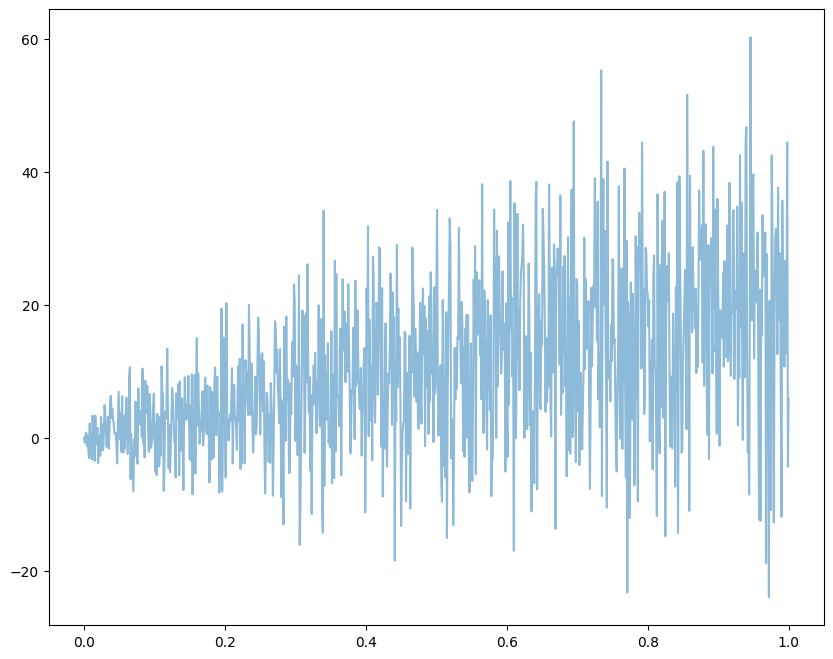

In [41]:
state_trajectory(num_time_pts=1000, mu=mu, sigma=sigma, gamma_h=gamma_h_phx, gamma_a=gamma_a_por, m_h=m_h, m_a=m_a, alpha_h=alpha_h_phx, alpha_a=alpha_a_por)

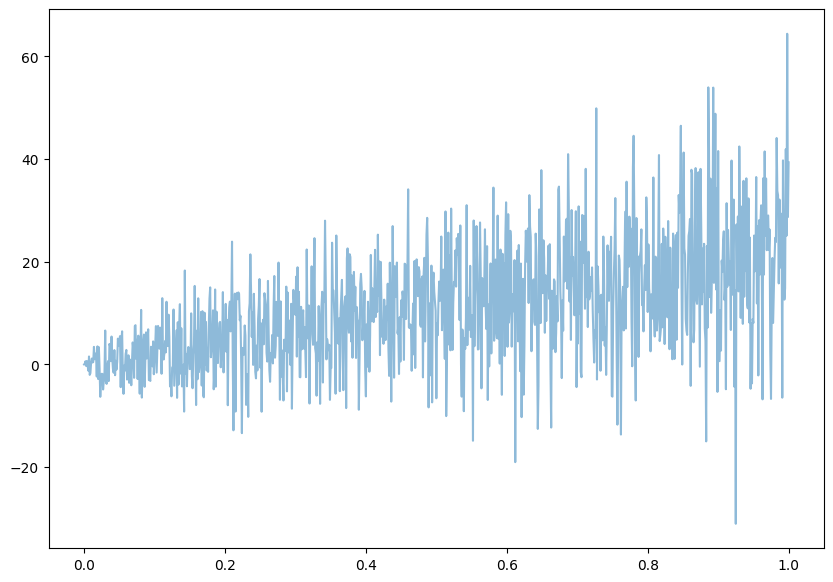

In [37]:
plt.figure(figsize=(10,7))
plt.plot(t, X_t, alpha=.5)